In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# 1. Load the dataset (replace with your dataset path if local)
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
data = pd.read_csv(url)

In [4]:
# 2. Basic Data Exploration
print("Dataset Info:\n")
print(data.info())
print("\nSummary Statistics:\n")
print(data.describe())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [5]:
# Check for class imbalance
fraud_cases = data['Class'].value_counts()
print("\nClass Distribution:\n", fraud_cases)


Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\Sofie\AppData\Local\Temp\ipykernel_21264\615746346.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_cases.index, y=fraud_cases.values, palette=["#FFA8B6", "#A8DADC"])


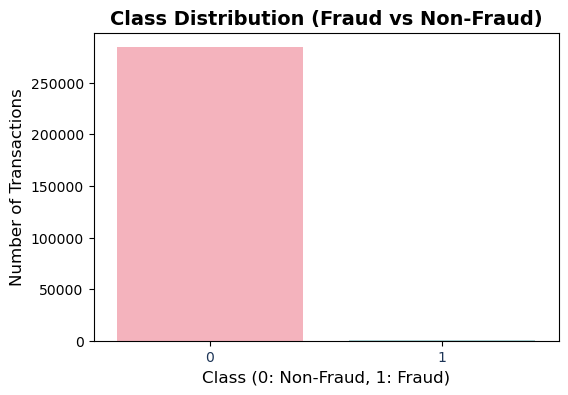

In [7]:
# 3. Visualizing Class Imbalance (updated style)
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_cases.index, y=fraud_cases.values, palette=["#FFA8B6", "#A8DADC"])
plt.title("Class Distribution (Fraud vs Non-Fraud)", fontsize=14, fontweight='bold')
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks([0, 1], fontsize=10, color='#1D3557')
plt.savefig("class_distribution_styled.png")
plt.show()

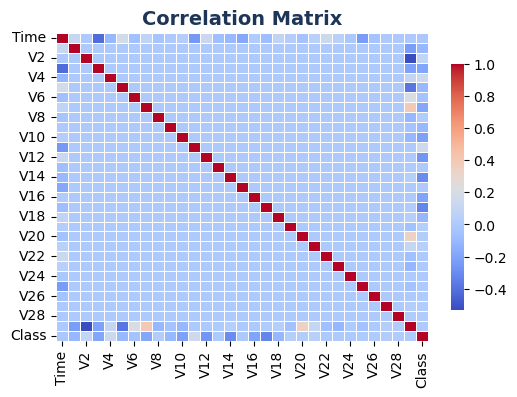

In [11]:
# 4. Correlation Heatmap (updated style)
corr = data.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, cmap="coolwarm", fmt=".2f", annot=False, cbar_kws={'shrink': .8}, linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14, fontweight='bold', color='#1D3557')
plt.savefig("correlation_matrix_styled.png")
plt.show()

In [12]:
# 5. Data Preparation
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# 6. Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
y_pred = model.predict(X_test)

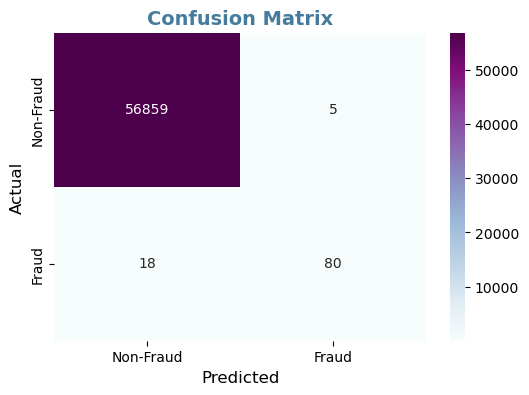

In [16]:
# 6. Confusion Matrix (updated style)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix", fontsize=14, fontweight='bold', color='#457B9D')
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.savefig("confusion_matrix_styled.png")
plt.show()

In [17]:
# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\Sofie\AppData\Local\Temp\ipykernel_21264\3169410441.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df[:10], palette=["#A8DADC"]*5 + ["#FFA8B6"]*5)


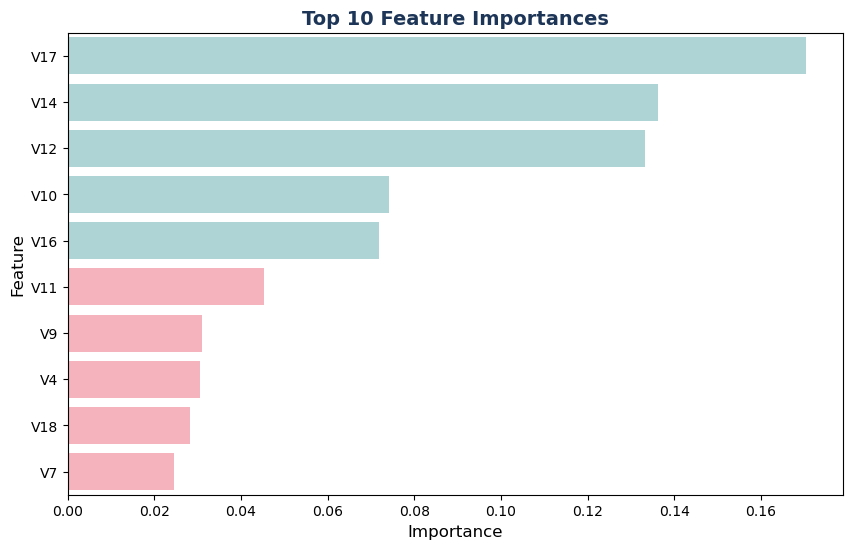

In [18]:
# 7. Feature Importance Visualization
feature_importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df[:10], palette=["#A8DADC"]*5 + ["#FFA8B6"]*5)
plt.title("Top 10 Feature Importances", fontsize=14, fontweight='bold', color='#1D3557')
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.savefig("feature_importance_styled.png")
plt.show()